# Ukraine Russia War Twitter Sentiment Analysis using Python

In that project I will try to analyze the sentiment of tweets of the Russian and Ukrainen war. I will use nltk and textblob to analyze the tweets. Let's get started.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
#Reading dataset
df=pd.read_csv("filename.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en,[],[],[],0,0,0,[],[],https://twitter.com/TomasLiptai/status/1630366...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,The Russia HAARP which could destroy USA in on...,en,[],['https://reality-choice.org/177/sura-the-russ...,[],0,0,0,[],[],https://twitter.com/paperfloure/status/1630366...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,Putin gives Steven Seagal Russia&amp;#8217;s O...,en,[],['https://thehill.com/blogs/in-the-know/387609...,[],0,0,0,[],[],https://twitter.com/katetbar1/status/163036622...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en,[],[],[],0,0,0,[],[],https://twitter.com/JlhRDHMOM/status/163036622...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en,[],[],[],0,0,0,[],[],https://twitter.com/PhemiKali/status/163036622...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [4]:
#I only need "tweet" and "language" columns to analyze
df=df[["tweet","language"]]

In [5]:
df.head()

,tweet,language
0,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en
1,The Russia HAARP which could destroy USA in on...,en
2,Putin gives Steven Seagal Russia&amp;#8217;s O...,en
3,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en
4,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en


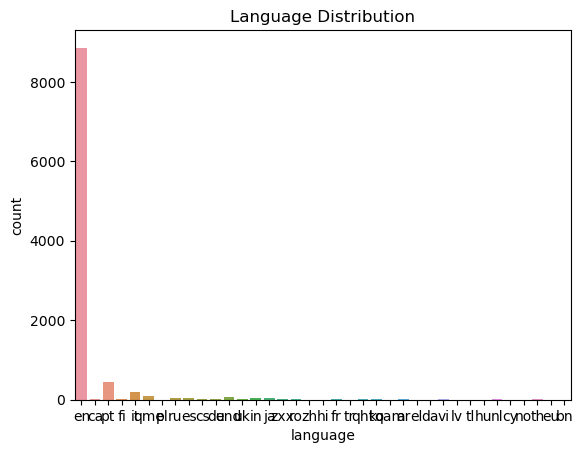

In [6]:
#A graph which shows language distribution
sns.countplot(x=df.language)
plt.title("Language Distribution")
plt.show()

# Preprocessing Tweets to Analyze

In [7]:
#Making all tweets in lower case
df["tweet"]=df.tweet.str.lower()

In [8]:
#Removing punctuations
df["tweet"]=df["tweet"].str.replace('[^\w\s]','',regex=True)

In [9]:
#Removing numbers
df["tweet"]=df["tweet"].str.replace('\d+','',regex=True)

In [10]:
#Removing \n
df["tweet"]=df["tweet"].str.replace('\n','',regex=True)

In [11]:
#Removing html tags
df["tweet"]=df["tweet"].str.replace(r"<.*?>",'',regex=True)

In [12]:
#I take only english tweets to analyze. If you want to analyze all tweets, you can remove this line or translate all texts to english. 
df=df[df.language=="en"]

In [13]:
df.shape

(8858, 2)

# Sentiment Analysis

In [14]:
#Importing necessary libraries
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [19]:
#Creating a function to generate wordcloud
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

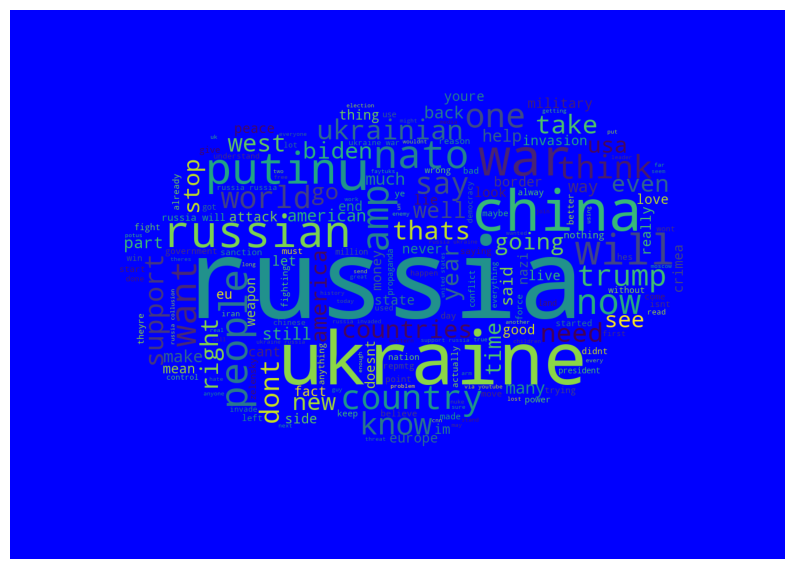

In [21]:
#All tweets
wc(df.tweet,'blue')

In [23]:
from textblob import TextBlob as tb

In [27]:
#Sentiment Analysis
#Polarity-->How positive or negative the text is. But I will calculate that once again with an another library.
#Subjectivity-->How subjective or objective the text is.
df["polarity"]=df["tweet"].apply(lambda x:tb(x).sentiment.polarity)
df["subjectivity"]=df["tweet"].apply(lambda x:tb(x).sentiment.subjectivity)

In [28]:
df.head()

,tweet,language,polarity,subjectivity
0,nazijaeger__ derwener anonymous russia is a pl...,en,0.000,0.0000
1,the russia haarp which could destroy usa in on...,en,-0.200,0.0000
2,putin gives steven seagal russiaamps order of ...,en,0.000,0.0000
3,mainelifer baddcompani its always projection o...,en,0.000,0.0000
4,pottingpinks mfa_russia mod_russia mil_hist_rf...,en,-0.075,0.3875


In [32]:
#That calculate positive, negative and neutral sentiments of tweets.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emirkaanozdemir/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
df.head()

,tweet,language,polarity,subjectivity,positive,negative,neutral
0,nazijaeger__ derwener anonymous russia is a pl...,en,0.000,0.0000,0.189,0.000,0.811
1,the russia haarp which could destroy usa in on...,en,-0.200,0.0000,0.000,0.289,0.711
2,putin gives steven seagal russiaamps order of ...,en,0.000,0.0000,0.266,0.000,0.734
3,mainelifer baddcompani its always projection o...,en,0.000,0.0000,0.000,0.000,1.000
4,pottingpinks mfa_russia mod_russia mil_hist_rf...,en,-0.075,0.3875,0.044,0.068,0.888


In [34]:
#That code parses the tweets into positive, negative and neutral.
positive=df[df["positive"]>0.333]
negative=df[df["negative"]>0.333]
neutral=df[df["neutral"]>0.333]

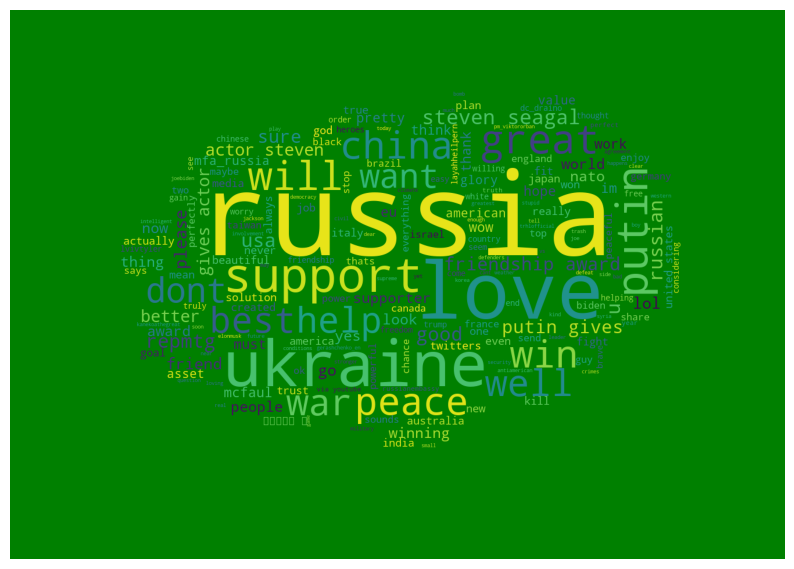

In [35]:
#A wordcloud of positive tweets
wc(positive.tweet,'green')

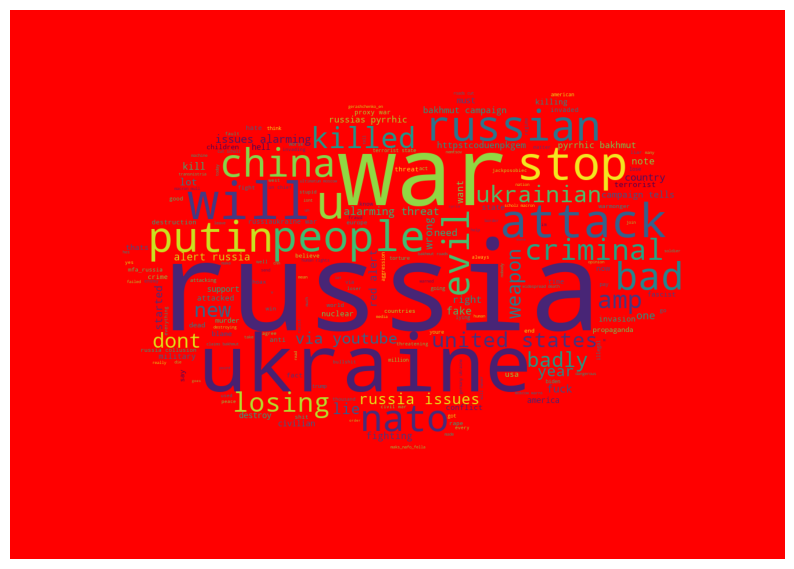

In [36]:
#A wordcloud of negative tweets
wc(negative.tweet,'red')

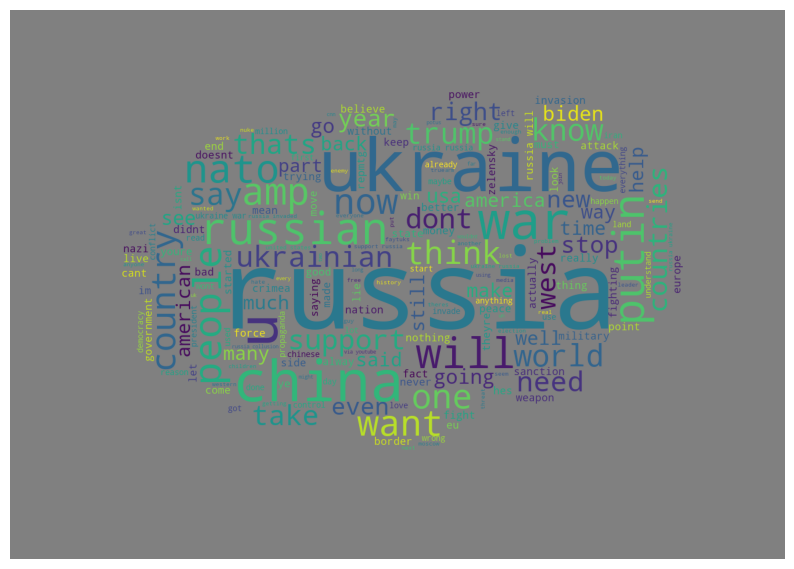

In [37]:
#A wordcloud of neutral tweets
wc(neutral.tweet,'grey')

In that project I tried to analyze the sentiment of tweets on the basis of the language. But there is one part that attracts attention positive tweets contain words like these:"peace,support,help,love" and negative tweets contain words like these:"war,bad,kill,criminal". We can understand that with machine learning easily, but if you want to learn that without machine learning you have to read each tweet.